In [64]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
apple = pd.read_csv('./datasets/AppleStore.csv')
google = pd.read_csv('./datasets/googleplaystore.csv')

In [7]:
apple.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [8]:
google.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
google = google[['Category', 'Rating', 'Reviews', 'Price']]
google.head()

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0
3,ART_AND_DESIGN,4.5,215644,0
4,ART_AND_DESIGN,4.3,967,0


In [10]:
apple = apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]
apple.head()

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00
3,Shopping,4.0,262241,0.00
4,Reference,4.5,985920,0.00


In [11]:
apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [12]:
google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [14]:
google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [17]:
google = google[google['Price'] != 'Everyone']

In [22]:
google['Price'] = google['Price'].str.replace('$','').astype('float64')

In [24]:
google.dtypes

Category     object
Rating      float64
Reviews      object
Price       float64
dtype: object

In [27]:
google['Reviews'] = google['Reviews'].astype('int64')

In [28]:
google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [29]:
apple['platform'] = 'apple'
google['platform'] = 'google'

In [31]:
google.columns

Index(['Category', 'Rating', 'Reviews', 'Price', 'platform'], dtype='object')

In [32]:
apple.columns

Index(['prime_genre', 'user_rating', 'rating_count_tot', 'price', 'platform'], dtype='object')

In [38]:
old_names = list(apple.columns)
new_names = list(google.columns)
apple = apple.rename(columns = dict(zip(old_names, new_names)))

In [39]:
apple.head()

,Category,Rating,Reviews,Price,platform
0,Games,4.0,21292,3.99,apple
1,Productivity,4.0,161065,0.00,apple
2,Weather,3.5,188583,0.00,apple
3,Shopping,4.0,262241,0.00,apple
4,Reference,4.5,985920,0.00,apple


In [40]:
google.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


In [41]:
df = google.append(apple, ignore_index=True)
df.sample(12)

,Category,Rating,Reviews,Price,platform
14782,Entertainment,4.5,247809,0.00,apple
13943,Games,4.5,16460,0.00,apple
1887,GAME,4.3,1295625,0.00,google
14439,Entertainment,3.5,42,3.99,apple
16459,Games,5.0,1,0.99,apple
15734,Games,4.5,408,4.99,apple
5719,TOOLS,4.7,2598579,0.00,google
5431,FAMILY,4.6,5195,0.00,google
13361,Games,4.0,669,5.99,apple
17999,Utilities,4.0,1,1.99,apple


In [135]:
print('df.shape before dropping NaNs: {}'.format(df.shape))
df = df.dropna()
print('df.shape after dropping NaNs: {}'.format(df.shape))

df.shape before dropping NaNs: (16512, 5)
df.shape after dropping NaNs: (15634, 5)


In [137]:
df[df['Reviews']==0].count()

Category    0
Rating      0
Reviews     0
Price       0
platform    0
dtype: int64

In [138]:
df.shape

(15634, 5)

In [139]:
df = df[df['Reviews']!=0]
df.shape

(15634, 5)

In [140]:
df.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


In [155]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


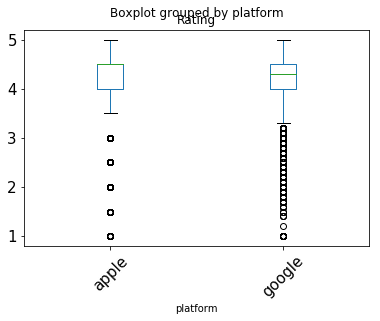

In [170]:
df.boxplot(by='platform', column='Rating', grid=False, rot=45, fontsize=15)

# Challenge 4
Null hypothesis: both google and apple ratings have the same mean.
Alternative hypothesis: google and apple ratings don't have the same mean.

In [157]:
apple = df[df['platform']=='apple']['Rating']
google = df[df['platform']=='google']['Rating']

In [158]:
t_test = stats.ttest_ind(apple, google)

In [159]:
t_test

Ttest_indResult(statistic=-14.294169045166113, pvalue=4.642189615775503e-46)

In [160]:
if t_test.pvalue <= 0.05:
    print('The p-value was: {}.\nThe observerd difference are very unlikely to be due to chance, we reject the null hypothesis.'.format(t_test.pvalue))
else:    
    print('The p-value was: {}.\nThe observerd difference are very likely to be due to chance, we accept the null hypothesis.'.format(t_test.pvalue))

The p-value was: 4.642189615775503e-46.
The observerd difference are very unlikely to be due to chance, we reject the null hypothesis.


In [161]:
welch = stats.ttest_ind(apple, google, nan_policy='omit', equal_var=False)
if welch.pvalue <= 0.05:
    print('The p-value was: {}.\nThe observerd difference are very unlikely to be due to chance, we reject the null hypothesis.'.format(welch.pvalue))
else:    
    print('The p-value was: {}.\nThe observerd difference are very likely to be due to chance, we accept the null hypothesis.'.format(welch.pvalue))

The p-value was: 1.607484672627137e-40.
The observerd difference are very unlikely to be due to chance, we reject the null hypothesis.


In [162]:
apple_normal = stats.normaltest(apple)
google_normal = stats.normaltest(google)

In [163]:
(apple_normal, google_normal)

(NormaltestResult(statistic=1778.9974234584017, pvalue=0.0),
 NormaltestResult(statistic=3678.6157187516856, pvalue=0.0))

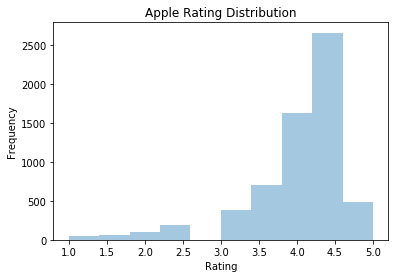

In [164]:
sns.distplot(apple, kde=False, bins=10)
plt.title('Apple Rating Distribution')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.show()

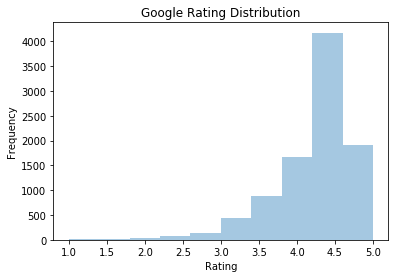

In [165]:
sns.distplot(google, kde=False, bins=10)
plt.title('Google Rating Distribution')
plt.ylabel('Frequency')
plt.xlabel('Rating')
plt.show()

In [166]:
mann_whitney = stats.mannwhitneyu(apple, google)
if welch.pvalue <= 0.05:
    print('The p-value was: {}.\nThe observerd difference are very unlikely to be due to chance, we reject the null hypothesis.'.format(mann_whitney.pvalue))
else:    
    print('The p-value was: {}.\nThe observerd difference are very likely to be due to chance, we accept the null hypothesis.'.format(mann_whitney.pvalue))

The p-value was: 1.4464448193978504e-12.
The observerd difference are very unlikely to be due to chance, we reject the null hypothesis.


## Permutations

In [171]:
df['Permutation1'] = np.random.permutation(df['Rating'])
df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.128845,0.607619,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.138789,0.616497,1.0,4.0,4.3,4.5,5.0


In [172]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [ ]:
difference=list()
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append()